In [2]:
import pandas as pd

In [3]:
labeled_data = pd.read_pickle('../../data/labeled_data_pos_ont.pkl')

In [4]:
nn_dict = set(
    ['ikje', 'vere', 'vore', 'kjem', 'ein', 'blei', 'vart', 'tydeleg', 'særleg', 'endeleg', 'berre', 'noko', 'nokon'
    'dei', 'seie', 'eit', 'tru', 'bu', 'mykje', 'desse', 'gjer', 'berre', 'fekk', 'mogelegheit', 'merksemd',
    'forståing', 'samanheng', 'tilrå', 'aning', 'busetnad', 'folk', 'storhending', 'veg', 'stad', 'framleis',
    'enno', 'finst', 'gjer', 'seier']
)

In [5]:
nb_dict = set(
    ['ikke', 'være', 'vært', 'kommer', 'man', 'ble', 'tydelig', 'særlig', 'endelig', 'bare', 'noe', 'noen'
    'de', 'si', 'en', 'tro', 'bo', 'mye', 'disse', 'gjør', 'bare', 'fikk', 'mulighet', 'oppmerksomhet',
    'forståelse', 'forbindelse', 'anbefale', 'anelse', 'bebyggelse', 'befolkning', 'begivenhet', 'vei', 'sted', 'fortsatt',
    'finnes', 'gjør', 'sier']
)

In [6]:
nn_lens = []
nb_lens = []
for article in labeled_data['Raw'].tolist():
    splitted = set(article.split())
    nn_lens.append(len(splitted & nn_dict))
    nb_lens.append(len(splitted & nb_dict))

In [7]:
nn_bool = []
for index in range(len(nn_lens)):
    if nn_lens[index] > nb_lens[index]:
        nn_bool.append(True)
    else:
        nn_bool.append(False)

In [9]:
labeled_data['NN_bool'] = nn_bool

In [54]:
labeled_data.to_pickle('../../data/labeled_data_pos_ont_nn.pkl')

In [14]:
drop_trash = labeled_data['Aggr.Label'] < 90
labeled_data = labeled_data[drop_trash]

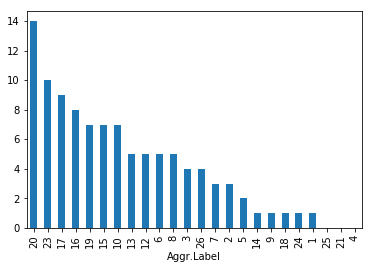

In [17]:
labeled_data.groupby('Aggr.Label')['NN_bool'].sum().sort_values(ascending=False).plot.bar()

In [57]:
labeled_data[labeled_data['NN_bool'] == True].sample(n=1)['Source']

251504    Aftenposten
Name: Source, dtype: category
Categories (2, object): [Aftenposten, VG]

In [58]:
labeled_data.shape

(37323, 79)